# Practica 06: Preparacion de Datos para su Analisis (ETL)

**Asignatura:** Extracción de Conocimiento en Bases de Datos  
**Unidad 2:** Preparación de los Datos  
**PE**: Ingeniería Desarrollo y Gestión de Software  
**Realizado por:** **Angel David reyes Tellez**: - 220432

## 1. Importacion de las librerias y paquetes a utilizar para el analisis de datos

In [56]:
# Práctica 06: Preparación de Datos para su Análisis (ETL)

# 1. Importación de las Librerías y Paquetes a utilizar para el análisis de datos.
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2. Ubicacion del origen de los datos

In [2]:
!cd

C:\Users\raulr\projects anaconda


In [9]:
!dir

 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: 94EF-8399

 Directorio de C:\Users\raulr\projects anaconda

17/06/2025  10:44 p. m.    <DIR>          .
09/06/2025  05:20 p. m.    <DIR>          ..
17/06/2025  10:42 p. m.    <DIR>          .ipynb_checkpoints
17/06/2025  08:26 p. m.           786,545 Practica6.ipynb
17/06/2025  10:44 p. m.           694,220 Practica6RRB.ipynb
17/06/2025  08:21 p. m.         4,127,489 salaries.csv
               3 archivos      5,608,254 bytes
               3 dirs  116,001,366,016 bytes libres


## 3. Construccion y consulta del dataframe

In [10]:
# Importación y acceso a un DataFrame (Matrix)
df = pd.read_csv("salaries.csv")

In [11]:
# Consultas básicas y metadatos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73151 non-null  float64
 1   experience_level    73151 non-null  object 
 2   employment_type     73151 non-null  object 
 3   job_title           73149 non-null  object 
 4   salary              73149 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73147 non-null  float64
 7   employee_residence  73151 non-null  object 
 8   remote_ratio        73150 non-null  float64
 9   company_location    73149 non-null  object 
 10  company_size        73151 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


In [12]:
# Cuantos registros tenemos? (tuplas, iterables)
df.size

804683

In [13]:
print(len(df))
#Devuelve el total de tuplas o registros

73153


Consultas Basicas sobre el Dataframe

In [14]:
df.head() #Devulvelos primeros 5 registros o tuplas de datos frame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


In [15]:
df.tail() ## Devuelve los ultimos datos del DataFrame, si no se especifica cuantos automaticamente devuelve los ultimos 5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73149,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
73150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73151,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73152,2021.0,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L


In [16]:
# Total de registros en el DataFrame
total_registros = len(df)
print(f"Total de registros: {total_registros}")

Total de registros: 73153


## 4. Limpieza de Datos previo al analisis

Eliminacion de datos duplicados

In [17]:
bf_sinduplicados = df.drop_duplicates()

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(bf_sinduplicados))

print("Registros/Tuplas eliminadas:", len(df) - len(bf_sinduplicados))

Tamaño del DF original 73153
Tamaño del DF sin duplicados 34028
Registros/Tuplas eliminadas: 39125


Importante: la eliminacion de duplicados debe realizarce con extremo cuidado sobre todo con datos agrupados o que no tienen una clave primaria o atributo identificador, por que existe el riesgo de alterar los resultados y tomar decisiones erradas.

Eliminar datos de registros con algun dato vacio en cualquier columna

In [18]:
bf_sinvacios = df.dropna()

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(bf_sinvacios))

print("Registros/Tuplas eliminadas:", len(df) - len(bf_sinvacios))

Tamaño del DF original 73153
Tamaño del DF sin duplicados 73145
Registros/Tuplas eliminadas: 8


In [19]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73151.000000,7.314900e+04,7.314700e+04,73150.000000
mean,2023.831376,1.626486e+05,1.594030e+05,21.579631
std,0.477219,1.933132e+05,3.549462e+05,41.020752
min,2020.000000,1.400000e+04,1.500000e+04,0.000000
25%,2024.000000,1.069600e+05,1.068950e+05,0.000000
50%,2024.000000,1.480000e+05,1.475000e+05,0.000000
75%,2024.000000,2.000000e+05,1.997000e+05,0.000000
max,2025.000000,3.040000e+07,9.378432e+07,100.000000


In [20]:
df.isnull() ## Mapea la matriz original con una matriz

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73148,True,True,True,True,True,True,True,True,True,True,True
73149,False,False,False,False,False,False,False,False,False,False,False
73150,True,True,True,True,True,True,True,True,True,True,True
73151,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.notnull() ## Realiza un mapeo de la matriz original colocando valores bolaneos de acuerdo a la condicion de si es nulo

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73148,False,False,False,False,False,False,False,False,False,False,False
73149,True,True,True,True,True,True,True,True,True,True,True
73150,False,False,False,False,False,False,False,False,False,False,False
73151,True,True,True,True,True,True,True,True,True,True,True


In [22]:
df_sinsalary = df.dropna(subset=['salary'])

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(df_sinsalary))

print("Registros/Tuplas eliminadas:", len(df) - len(df_sinsalary))

Tamaño del DF original 73153
Tamaño del DF sin duplicados 73149
Registros/Tuplas eliminadas: 4


Reemplazar valores nulos con uno especifico

In [23]:
df_valoresdeSalarioSustituido = df.fillna(value = 'N/A')

Verificamos los nuevos datos

In [24]:
df_valoresdeSalarioSustituido

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73148,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
73149,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
73150,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
73151,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L


Sustitucion de valores

In [25]:
df_valoresdeSalarioSustituido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73153 non-null  object
 1   experience_level    73153 non-null  object
 2   employment_type     73153 non-null  object
 3   job_title           73153 non-null  object
 4   salary              73153 non-null  object
 5   salary_currency     73153 non-null  object
 6   salary_in_usd       73153 non-null  object
 7   employee_residence  73153 non-null  object
 8   remote_ratio        73153 non-null  object
 9   company_location    73153 non-null  object
 10  company_size        73153 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73151 non-null  float64
 1   experience_level    73151 non-null  object 
 2   employment_type     73151 non-null  object 
 3   job_title           73149 non-null  object 
 4   salary              73149 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73147 non-null  float64
 7   employee_residence  73151 non-null  object 
 8   remote_ratio        73150 non-null  float64
 9   company_location    73149 non-null  object 
 10  company_size        73151 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


Que pasaria si con el nuevo DataFrame ejecuti un nuevo describe?

In [27]:
df_valoresdeSalarioSustituido.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73153.0,73153,73153,73153,73153.0,73153,73153.0,73153,73153.0,73153,73153
unique,7.0,6,5,290,7097.0,26,7703.0,94,4.0,87,4
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62228.0,42925,72811,11441,1437.0,69421,1426.0,65985,57224.0,66036,70541


Sustitucion de salarios null a 0.0

In [28]:
df_valoresdeSalarioSustituidoporCero = df.fillna({'salary': 0.0, 'salary_in_usd': 0.0})

In [29]:
df_valoresdeSalarioSustituidoporCero

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73148,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
73149,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
73150,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
73151,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L


In [30]:
df_valoresdeSalarioSustituidoporCero.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73151.000000,7.315300e+04,7.315300e+04,73150.000000
mean,2023.831376,1.626397e+05,1.593899e+05,21.579631
std,0.477219,1.933116e+05,3.549345e+05,41.020752
min,2020.000000,0.000000e+00,0.000000e+00,0.000000
25%,2024.000000,1.069300e+05,1.068850e+05,0.000000
50%,2024.000000,1.480000e+05,1.475000e+05,0.000000
75%,2024.000000,2.000000e+05,1.997000e+05,0.000000
max,2025.000000,3.040000e+07,9.378432e+07,100.000000


In [31]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'MX', 'EX', nan], dtype=object)

In [32]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42925
MI     21851
EN      6876
EX      1494
MX         5
NaN        2
Name: count, dtype: int64

## 5. Analisis Basico del DataFrame (Datos Estadisticos Generales)

Metodo que realiza un reporte de los valores estadisticos basicos (media, conteo, mediana, desciacion, estandar, valor maximo, valor minimo y la concentracion de frecuencia de 25%, 50%, 75% sobre los datos **Cuantitativos** excluyendo loa valores **cualitativos**)

In [33]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73151.000000,7.314900e+04,7.314700e+04,73150.000000
mean,2023.831376,1.626486e+05,1.594030e+05,21.579631
std,0.477219,1.933132e+05,3.549462e+05,41.020752
min,2020.000000,1.400000e+04,1.500000e+04,0.000000
25%,2024.000000,1.069600e+05,1.068950e+05,0.000000
50%,2024.000000,1.480000e+05,1.475000e+05,0.000000
75%,2024.000000,2.000000e+05,1.997000e+05,0.000000
max,2025.000000,3.040000e+07,9.378432e+07,100.000000


## 6. Definir los criterios de analisis (categorias)

In [34]:
analysis_criteria = ['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']

## 7. Graficamos algo Basico

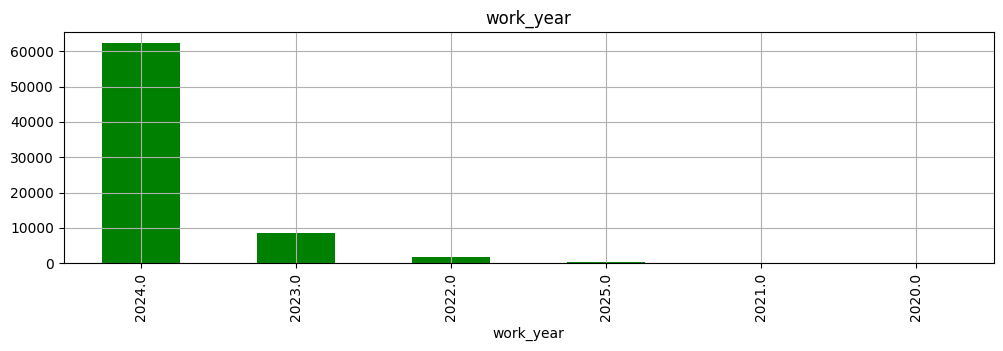

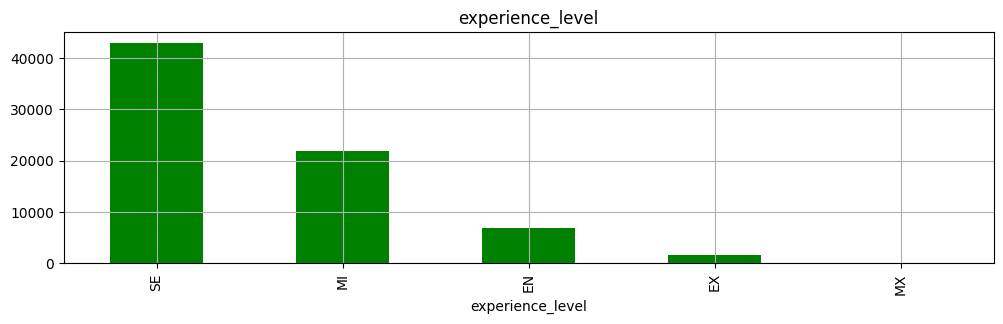

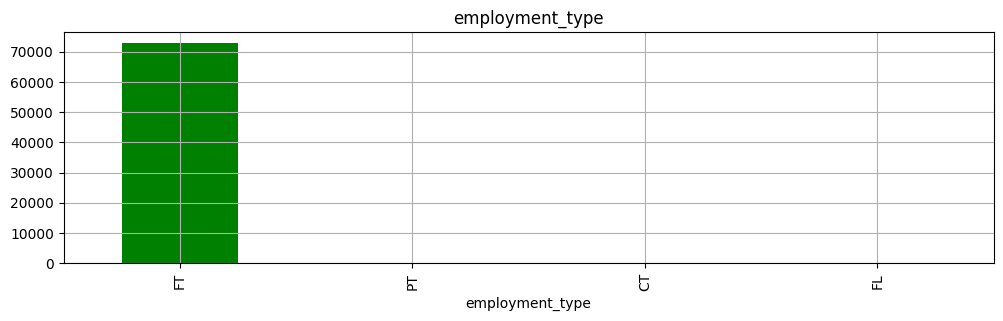

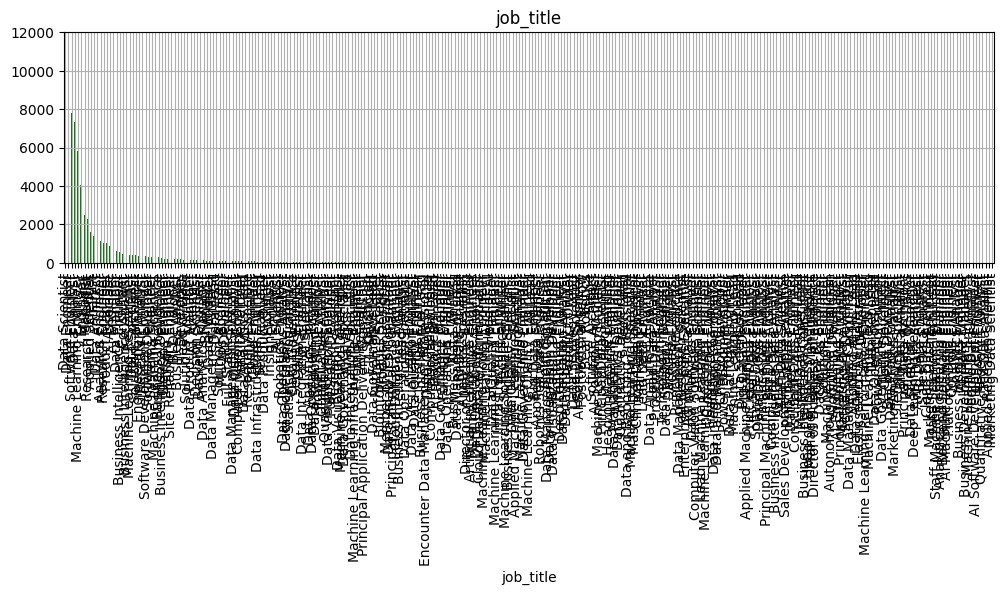

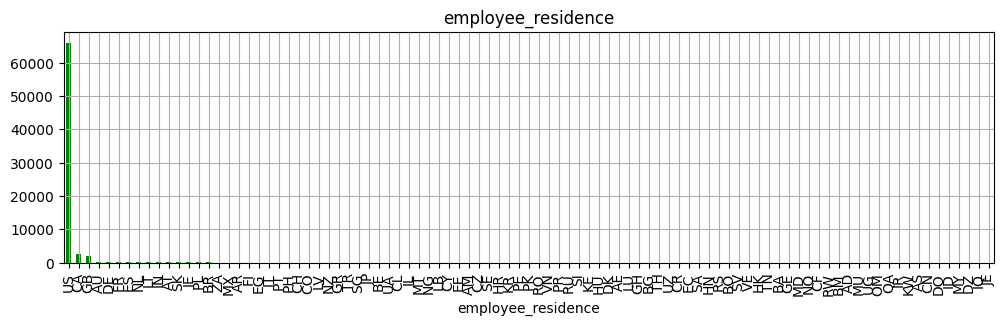

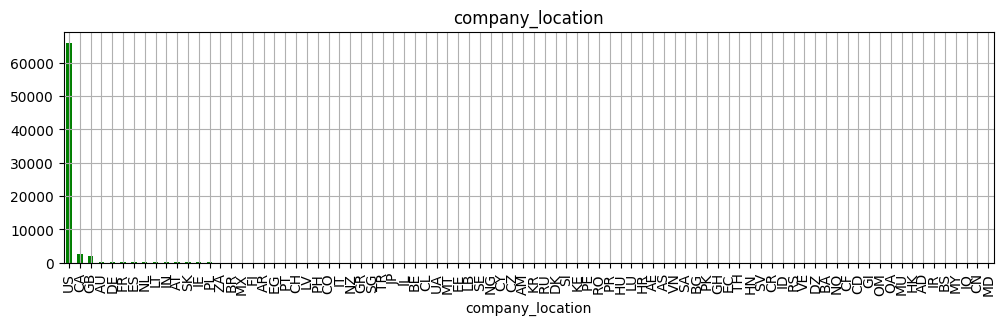

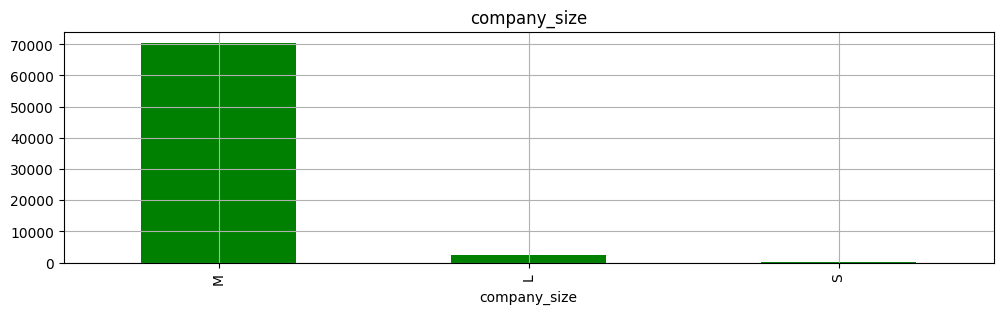

In [36]:
def_color = 'green'

for f in analysis_criteria:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

## 8. Limpiamos los datos y solo nos enfocaremos en los datos recolectados desde el 2023, empleos de tiempo completo (Full time) en EU (US)

In [38]:
# Crearemos un subconjunto de la muestra original

df_after2023 = df[(df.work_year>=2023) & 
               (df.employment_type=='FT') & 
               (df.company_location=='US') &
               (df.salary_in_usd)]

Revisamos los datos metadatos de la nueva muestra

In [39]:
df_after2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64327 entries, 0 to 71257
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           64327 non-null  float64
 1   experience_level    64327 non-null  object 
 2   employment_type     64327 non-null  object 
 3   job_title           64327 non-null  object 
 4   salary              64327 non-null  float64
 5   salary_currency     64327 non-null  object 
 6   salary_in_usd       64327 non-null  float64
 7   employee_residence  64327 non-null  object 
 8   remote_ratio        64327 non-null  float64
 9   company_location    64327 non-null  object 
 10  company_size        64327 non-null  object 
dtypes: float64(4), object(7)
memory usage: 5.9+ MB


In [40]:
print(len(df_after2023))

64327


In [41]:
df_mexico = df[df['employee_residence']=='MX']

print(len(df_mexico))

52


In [42]:
analysis_usd = ['salary_in_usd']

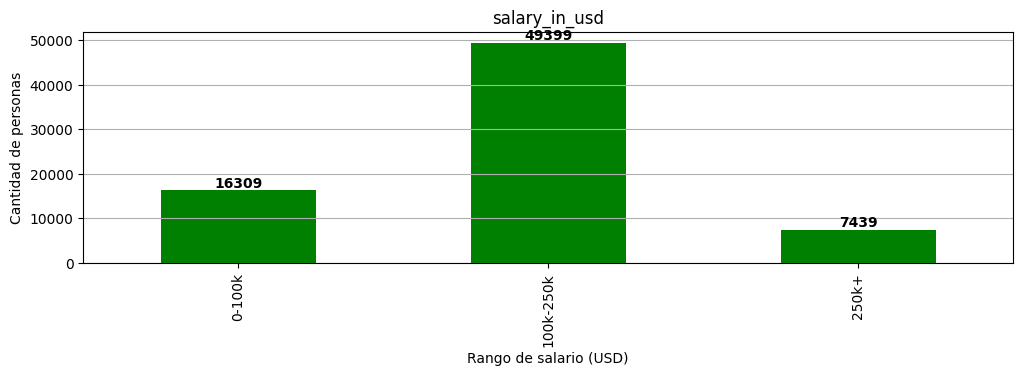

In [44]:
def_color = 'green'

for f in analysis_usd:
    plt.figure(figsize=(12, 3))
    
    bins = [0, 100000, 250000, float('inf')]
    labels = ['0-100k', '100k-250k', '250k+']
    categorized = pd.cut(df[f], bins=bins, labels=labels)
    
    counts = categorized.value_counts().sort_index()
    
    ax = counts.plot(kind='bar', color=def_color)
    
    for i, v in enumerate(counts):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.title(f)
    plt.ylabel('Cantidad de personas')
    plt.xlabel('Rango de salario (USD)')
    plt.grid(axis='y')
    
    plt.show()